# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

# Introducción

El cáncer representa una de las principales causas de muerte a nivel mundial, y su impacto se extiende a todas las regiones, incluyendo México. Según la Organización Mundial de la Salud (OMS), en 2020 se registraron aproximadamente 19.3 millones de nuevos casos de cáncer y 10 millones de muertes por esta enfermedad en todo el mundo [1]. En México, el cáncer es la tercera causa de muerte, con un estimado de 90,000 defunciones anuales [2].

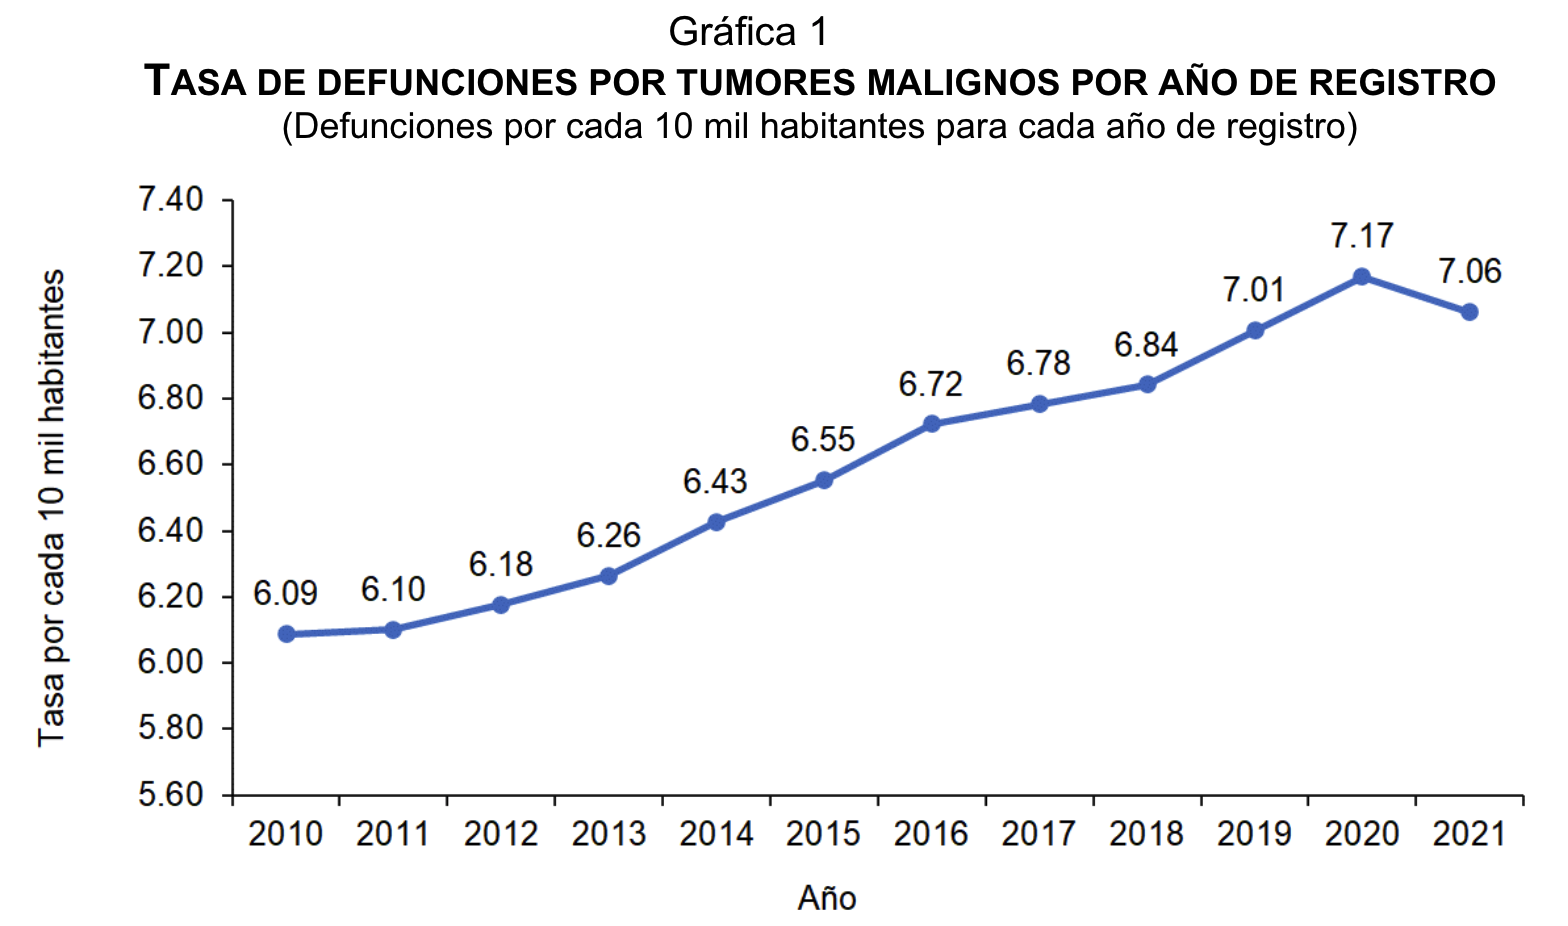

Ante esta problemática, la investigación científica se centra en desarrollar nuevos tratamientos y mejorar los existentes. Uno de los focos de atención es la proteína VEGF165 (Factor de Crecimiento Endotelial Vascular), la cual juega un papel crucial en la angiogénesis, el proceso de formación de nuevos vasos sanguíneos. En el contexto del cáncer, la sobreexpresión de VEGF165 promueve el crecimiento tumoral y la metástasis, haciendo de esta proteína un objetivo terapéutico atractivo.

El objetivo de este proyecto es desarrollar un modelo de IA capaz de identificar compuestos moleculares con alta eficiencia en la inhibición de VEGF165, lo que podría conducir al desarrollo de nuevos fármacos para el tratamiento del cáncer. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.

En esta etapa, se analizarán datos de la base de datos obtenida de la pagina Data of  Cancer Therapy Peptides, http://dctpep.cpu-bioinfor.org/, la cual contiene información sobre peptidos usados en terapias contra el cancer. El análisis exploratorio nos permitirá:

* Comprender la distribución de los datos: Identificar patrones, tendencias y valores atípicos en las variables relevantes para la inhibición de VEGF165.

* Descubrir relaciones entre las variables: Explorar posibles correlaciones entre las características del dataset.

* Identificar variables importantes: Seleccionar las variables más relevantes para el desarrollo del modelo de IA.

El análisis exploratorio de datos es fundamental para la construcción de un modelo de IA efectivo. Al comprender las características de los datos, podremos tomar decisiones informadas sobre las técnicas de preprocesamiento y modelado a aplicar en las etapas posteriores del proyecto.

Este proyecto tiene el potencial de contribuir significativamente a la lucha contra el cáncer, una enfermedad que afecta a millones de personas en todo el mundo, incluyendo México. El desarrollo de nuevos fármacos usando peptidos que inhiban la acción de VEGF165 y asi mejorar la eficacia de los tratamientos y ofrecer nuevas esperanzas a los pacientes.

# Análisis Exploratorio de Datos (EDA)

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Conexión con Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Muestra todas las columnas
pd.set_option('display.max_columns', None)

## Carga del Dataset

In [3]:
# Ruta al archivo general_amps descargado de: http://dctpep.cpu-bioinfor.org/
#ruta_excel = '/content/drive/MyDrive/Colab Notebooks/MNA/Proyecto/peptide_library_all.xlsx' #colab run
ruta_excel = '../data/raw/peptide_library_all.xlsx'  #local run

# Leer el archivo Excel en un DataFrame
df = pd.read_excel(ruta_excel)

# Mostrar las primeras filas del DataFrame
df.head(3).T

,0,1,2
DCTPep_ID,DCTPep00001,DCTPep00002,DCTPep00003
DRAMP_ID,DRAMP02912,Not available,Not available
CancerPPD_ID,Not available,Not available,Not available
DBAASP_ID,1485,Not available,Not available
Cppsite_ID,Not available,Not available,Not available
Peptide_Name,SMAP-29,CA-MA,CA-MA3
Sequence,RGLRRLGRKIAHGVKKYGPTVLRIIRIA,KWKLFKKIGIGKFLHSAKKF,KWKLFKKIGPGKFLHSAKKF
Sequence_Length,28,20,20
UniProt_ID,Not available,Not available,Not available
PubChem_CID,16130512,Not available,Not available


## Información general del Dataset

In [4]:
df.shape

(6107, 51)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DCTPep_ID                        6107 non-null   object 
 1   DRAMP_ID                         6107 non-null   object 
 2   CancerPPD_ID                     6107 non-null   object 
 3   DBAASP_ID                        6098 non-null   object 
 4   Cppsite_ID                       6107 non-null   object 
 5   Peptide_Name                     5876 non-null   object 
 6   Sequence                         6107 non-null   object 
 7   Sequence_Length                  6107 non-null   int64  
 8   UniProt_ID                       6107 non-null   object 
 9   PubChem_CID                      6107 non-null   object 
 10  Origin                           6067 non-null   object 
 11  Type                             6069 non-null   object 
 12  Hemolytic_Activity  

Las siguientes columnas representan números de identificación y nombre de cada péptido dentro de diferentes bases de datos, por lo que las eliminaremos del dataset. Algunas bases no cuentan con dicha proteína por lo que se encuentran con la leyenda de 'Not Avaliable':

- Peptide_Name: Nombre de cada péptido en DCTPep.
- Structure: Estructura predicha por Alphafold, Mostrar con Mol*viewer, haga clic para descargar los archivos PDB.
- DCTPep_ID: El campo proporciona el número de acceso único que se vincula a la entrada DCTPep correspondiente.
- DRAMP_ID: El campo proporciona el número de acceso único que se vincula a la entrada DRAMP correspondiente.
- CancerPPD_ID: El campo proporciona el número de acceso único que se vincula a la entrada CancerPPD correspondiente.
- DBAASP_ID: El campo proporciona el número de acceso único que se vincula a la entrada DBAASP correspondiente.
- Cppsite_ID: El campo proporciona el número de acceso único que se vincula a la entrada Cppsite correspondiente.
- UniProt_ID: Proporciona los enlaces de acceso que dirijan a las entradas externas de Uniprot.
- PubChem_CID: CID de PubChem
- Predicted_Structure_ID: Estructura predicha por Alphafold, Mostrar con Mol*viewer, haga clic para descargar los archivos PDB.
- PDB_ID: Proporcione enlaces de acceso que dirijan a la entrada PDB correspondiente.
- Patent_ID: Numero de patente
- Patent_Title: Nombre de la patente
- Other_Published_ID: Otros identificadores publicados
- Literature: La información de los péptidos proviene de todo tipo de literatura o patentes, y la sección proporciona la forma de encontrar el texto completo.

In [6]:
# Variables de identificación
id_col = ['Peptide_Name', 'Structure','DCTPep_ID', 'DRAMP_ID', 'CancerPPD_ID', 'DBAASP_ID', 'Cppsite_ID', 'UniProt_ID',
          'PubChem_CID', 'Predicted_Structure_ID', 'PDB_ID', 'Patent_ID', 'Other_Published_ID', 'Literature', 'Patent_Title']
print('Número de variables de indentificación: ',len(id_col))
df[id_col].describe().T

Número de variables de indentificación:  15


,count,unique,top,freq
Peptide_Name,5876,5699,Xentry peptides,21
Structure,6107,2312,Not available,3796
DCTPep_ID,6107,6107,DCTPep00001,1
DRAMP_ID,6107,53,Not available,6055
CancerPPD_ID,6107,88,Not available,6020
DBAASP_ID,6098,1572,Not available,4515
Cppsite_ID,6107,749,Not available,5359
UniProt_ID,6107,473,Not available,5256
PubChem_CID,6107,64,Not available,6043
Predicted_Structure_ID,6107,2312,Not available,3796


In [7]:
# Elimina variables de identificación
df.drop(id_col, axis=1, inplace=True)

### Secuancias de aminoácidos duplicados

Las secuencias de aminoácidos son la estructura de los péptidos y proteínas, debido a eso, las secuencias que se encuentren duplicadas representan peptidos duplicados. Debido a esto se eliminaran del dataset para dejar solo proteínas únicas.

In [8]:
# Muestra solo los mayores a 1 en value_counts
df['Sequence'].value_counts()[df['Sequence'].value_counts() > 1]

Sequence
GLLxRIkTLL                      7
GLLkRIxTLL                      7
VKRFKKFFRKLKKSV                 6
XXLXAXX                         6
DDEⓍEQFⓍYHLXSFNXV               5
                               ..
VALALKALKKALKKLKKALKKAL         2
VRRFPWWWPFLRR                   2
DDEⓍEQFⓍYHLLSFNAV               2
TCRSSGRYCRSPYDRRRRYCRRITDACV    2
CSKSSDYQC                       2
Name: count, Length: 178, dtype: int64

In [9]:
# Ejemplo de péptido duplicado
df.loc[df['Sequence']=='GLLxRIkTLL']

,Sequence,Sequence_Length,Origin,Type,Hemolytic_Activity,Cytotoxicity,Binding_Target,Affinity,Mechanism,Nature,*,Classification,Helicity,Linear_Cyclic,Disulfide_Bond,N-terminal_Modification,C-terminal_Modification,Other_Modification,Chiral,Mass,Formula,Absent_amino_acids,Common_amino_acids,pI,Basic_residues,Acidic_residues,Net_charge,Polar_residues,Hydrophobic_residues,Hydrophobicity,Boman_Index,Half_Life,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm,Other_Information
2122,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis>256 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C4 (D-Lysine with butyrylated side gro...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2123,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis>256 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C6 (D-Lysine with 2-hexanoylated side ...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2124,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis>256 µM,HEK293T: IC50>256 µM,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C8 (D-Lysine with octanoylated side gr...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2125,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=256 µM,HEK293T: IC50=128 µM,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C10 (D-Lysine with decanoylated side g...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2126,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=32 µM,HEK293T: IC50=32 µM,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C12 (D-Lysine with laurylated side gro...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2127,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=32 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C14 (D-Lysine with myristoylated side ...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not available
2128,GLLxRIkTLL,10,Synthetic (Derived from Anoplin),Synthetic peptide,Mouse erythrocytes: 10% Hemolysis=16 µM,Not available,Not available,Not available,Not available,Anticancer; Antimicrobial; Antifungal,Not available,Tumor active peptide##Membrane lysis,Not available,Linear,Not available,Free,Amidation,x=D-Lys-C16 (D-Lysine with palmitoylated side ...,Mix,102285,C42H75N11O8,ACDEFHKMNPQSVWY,L,10.55,1,0,1,2,5,141.0,805,Mammalian: 30 hour##Yeast: >20 hour##E.coli: >...,195.0,0,0.0,Not availabl

In [10]:
# Elimina duplicados en la columna 'Sequence'
df = df[~df['Sequence'].duplicated(keep='first')]

# Asigna la secuencia como Indice
df.set_index('Sequence', inplace=True)

### Valores Nulos
Es importante identificar aquellas columnas con un alto porcentaje de valores nulos.En algunas de las variables en vez de tener el campo en nulo dicen 'Not available'. En estos casos sustituiremos dicha frase por campos nulos.

In [11]:
# Convertir a nulo todos aquellos que digan 'Not available'
df.replace('Not available', None, inplace=True)

print('Proporción de Valores Nulos:')
print((df.isnull().sum()/df.shape[0]).round(2).sort_values(ascending=False))

Proporción de Valores Nulos:
*                                  1.00
Helicity                           0.99
Affinity                           0.98
Mechanism                          0.93
Other_Information                  0.88
Other_Modification                 0.84
Cytotoxicity                       0.81
Hemolytic_Activity                 0.80
Disulfide_Bond                     0.79
Binding_Target                     0.78
Linear_Cyclic                      0.11
N-terminal_Modification            0.06
C-terminal_Modification            0.06
Type                               0.01
Origin                             0.01
Extinction_Coefficient_cystines    0.00
Net_charge                         0.00
Absorbance_280nm                   0.00
Aliphatic_Index                    0.00
Half_Life                          0.00
Boman_Index                        0.00
Hydrophobicity                     0.00
Hydrophobic_residues               0.00
Polar_residues                     0.00
Sequence_Le

Las variables con alto porcentaje de valores nulos (mayor al 50%) son los siguientes:
- *:
- Helicity: Porcentaje de α hélices
- Affinity: Afinidad de unión entre péptidos y targets.
- Mechanism: Mecanismo de los péptidos que actúan como agentes anticancerígenos.
- Other_Information: Otra informacion
- Other_Modification: Aminoácidos
- Cytotoxicity: Información de citotoxicidad frente a líneas celulares normales (no cancerosas).
- Hemolytic_Activity: Información sobre la actividad hemolítica frente a los glóbulos rojos (RBC).
- Disulfide_Bond: Enlace de disulfuro (DSB) u otro enlace, como el enlace de cadena lateral-cadena principal (SMB), enlace peptídico N-C termini (NCB).
- Binding_Target: Sitio de acción de los péptidos contra las células cancerosas.
- Patent_Title: Nombre de la patente

Como podemos observar existen variables con alto porcentaje de valores nulos pero que dan información importante sobre el efecto clínico sobre los pacientes (por ejemplo: citotoxicidad, actividad hemolítica) o sobre su mecanismo de acción (por ejemplo: afinidad y mecanismo). Por tal motivo no es recomendable eliminarlos de primera instancia.




In [12]:
# Se elimina columna '*' por que todos sus valores son nulos
df.drop(['*'], axis=1, inplace=True)
df.shape

(5851, 34)

Las variables con las que cuenta el Dataset, posterior a que se quitaron los id y aquellas con mayor proporción de valores nulos, son los siguientes:

- Sequence: La secuencia peptídica que se representa mediante códigos de una sola letra. Los L-aminoácidos se expresan en mayúsculas y los D-aminoácidos se expresan en letras minúsculas. X se refiere a los aminoácidos modificados.
- Sequence_Length: Número de residuos en la secuencia peptídica.
- Origin: El organismo donde se extrajeron o aislaron los péptidos o proteínas.
- Type: Los péptidos se dividen en péptidos nativos y péptidos sintéticos según su origen.
- Nature: Clasificación de la actividad biológica. Además de anticancerígeno, también incluye antibacteriano, antifúngico, antiviral...
- Classification: Clasificados por tipo de péptido o mecanismo. Incluyendo péptidos dirigidos molecularmente, péptidos que penetran en las células, péptidos que se dirigen a tumores, mecanismo dirigido a la membrana, mecanismo de apoptosis, mecanismo - antiangiogénico...
- Linear_Cyclic: Peptido ciclico o linear
- N-terminal_Modification: Las modificaciones del terminal N según las referencias
- C-terminal_Modification: Las modificaciones del terminal C según las referencias
especiales (de 20 aminoácidos comunes).
- Chiral: Los aminoácidos L/D consisten en péptidos.
- Mass: Masa
- Formula: Formula del péptido
- Absent_amino_acids: Aminoacidos no incluidos
- Common_amino_acids: Animoacido mas comun en la sequencia
- pI: Punto isoeléctrico
- Basic_residues: Número de residuos base
- Acidic_residues: Número de residuos ácidos
- Net_charge: Carga Neta
- Polar_residues: Número de residuos polares
- Hydrophobic_residues: Número de residuos hidrofóbicos
- Hydrophobicity: Hidrofobicidad
- Boman_Index: Índice de Boman
- Half_Life: Vida media
- Aliphatic_Index: Índice alifático
- Extinction_Coefficient_cystines: Coeficiente de extinción de cistinas
- Absorbance_280nm: Absorbancia a 280nm
- Literature: La información de los péptidos proviene de todo tipo de literatura o patentes, y la sección proporciona la forma de encontrar el texto completo.

## Péptidos con actividad sobre VEGF
El objetivo del proyecto es crear un modelo que nos prediga la actividad de los péptidos sobre la proteína Diana VEGF. Por tal motivo, es importante identificar los péptidos con dicho efecto.

In [13]:
# Columna que identifica el efecto sobre la proteína diana 'VEGF' en cualquier columna
df['VEGF'] = df.apply(lambda x: x.astype(str).str.contains('VEGF').any()  , axis=1)
vegf = df.loc[df['VEGF']]
print('Peptidos con actividad sobre VEGF: ',vegf.shape[0])
vegf.head(5)

Peptidos con actividad sobre VEGF:  24


,Sequence_Length,Origin,Type,Hemolytic_Activity,Cytotoxicity,Binding_Target,Affinity,Mechanism,Nature,Classification,Helicity,Linear_Cyclic,Disulfide_Bond,N-terminal_Modification,C-terminal_Modification,Other_Modification,Chiral,Mass,Formula,Absent_amino_acids,Common_amino_acids,pI,Basic_residues,Acidic_residues,Net_charge,Polar_residues,Hydrophobic_residues,Hydrophobicity,Boman_Index,Half_Life,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm,Other_Information,VEGF
Sequence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RRPKGRGKRRREKQRP,16,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,232913,C84H157N41O20,ACDFHILMNSTVWY,R,12.91,10,1,9,2,0,-338.75,-13156,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,0.00,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
RRPKGRGKRRREKQRPCDKPRR,22,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,319204,C114H210N54O28S,AFHILMNSTVWY,R,12.61,13,2,11,3,0,-316.82,-17439,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,0.00,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
RRPKGRGKRRREKQRPSDKPRR,22,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,317597,C114H210N54O29,ACFHILMNTVWY,R,12.81,13,2,11,3,0,-331.82,-17907,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,0.00,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
RRPKGRGKRRREKQRPDAVPRR,22,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Linear,None,Free,Free,NaN,L,313094,C113H207N53O28,CFHILMNSTWY,R,12.81,12,2,10,2,2,-283.18,-16427,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,17.73,0,0.00,Patent Application; Family: 5s / 5ex; Family J...,True
CKGRGKRCREKQRPSDKPRR,20,Synthetic,Synthetic peptide,None,None,VEGF165,None,Its mechanism that involves competition for VE...,Anticancer,Tumor active peptide##Cancer targeted peptides...,None,Cyclic,Cys1<--->Cys8,Free,Free,NaN,L,278092,C97H177N43O27S2,AFHILMNTVWY,R,11.93,10,2,8,5,0,-264.50,-13175,Mammalian: 1.2 hour##Yeast: >20 hour##E.coli: ...,0.00,125,6.58,Patent Application; Family: 5s / 5ex; Family J...,True


## Segmentación de Variables

In [14]:
# La columna Helicity se transforma a númerica
df['Helicity'] = df['Helicity'].str.replace('%', '').astype(float)
# La columna 'VEGF' se tranforma en string
df['VEGF'] = df['VEGF'].astype(int)
# Segmentación en variables númericas y categóricas:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns

#### Variables Numéricas

In [15]:
print('Total de variables numéricas: ', len(num_col))

Total de variables numéricas:  15


In [16]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Sequence_Length,5851.0,17.358742,9.955594,2.00,10.00,15.00,23.00,97.00
Helicity,36.0,38.554167,22.952987,0.35,27.20,36.25,49.80,89.80
Mass,5851.0,227110.658862,132823.364603,-576.00,137212.00,199463.00,302478.00,1230031.00
pI,5851.0,9.326156,2.932098,3.17,6.34,10.30,11.65,13.78
Basic_residues,5851.0,4.193129,3.447575,0.00,1.00,4.00,6.00,35.00
Acidic_residues,5851.0,1.075372,1.786261,0.00,0.00,0.00,1.00,20.00
Net_charge,5851.0,3.117758,3.630353,-9.00,0.00,3.00,6.00,35.00
Polar_residues,5851.0,3.764656,4.473147,0.00,1.00,3.00,5.00,41.00
Hydrophobic_residues,5851.0,6.185267,4.128889,0.00,3.00,6.00,9.00,40.00
Hydrophobicity,5851.0,-33.312748,116.400063,-450.00,-98.89,-33.00,43.33,420.00


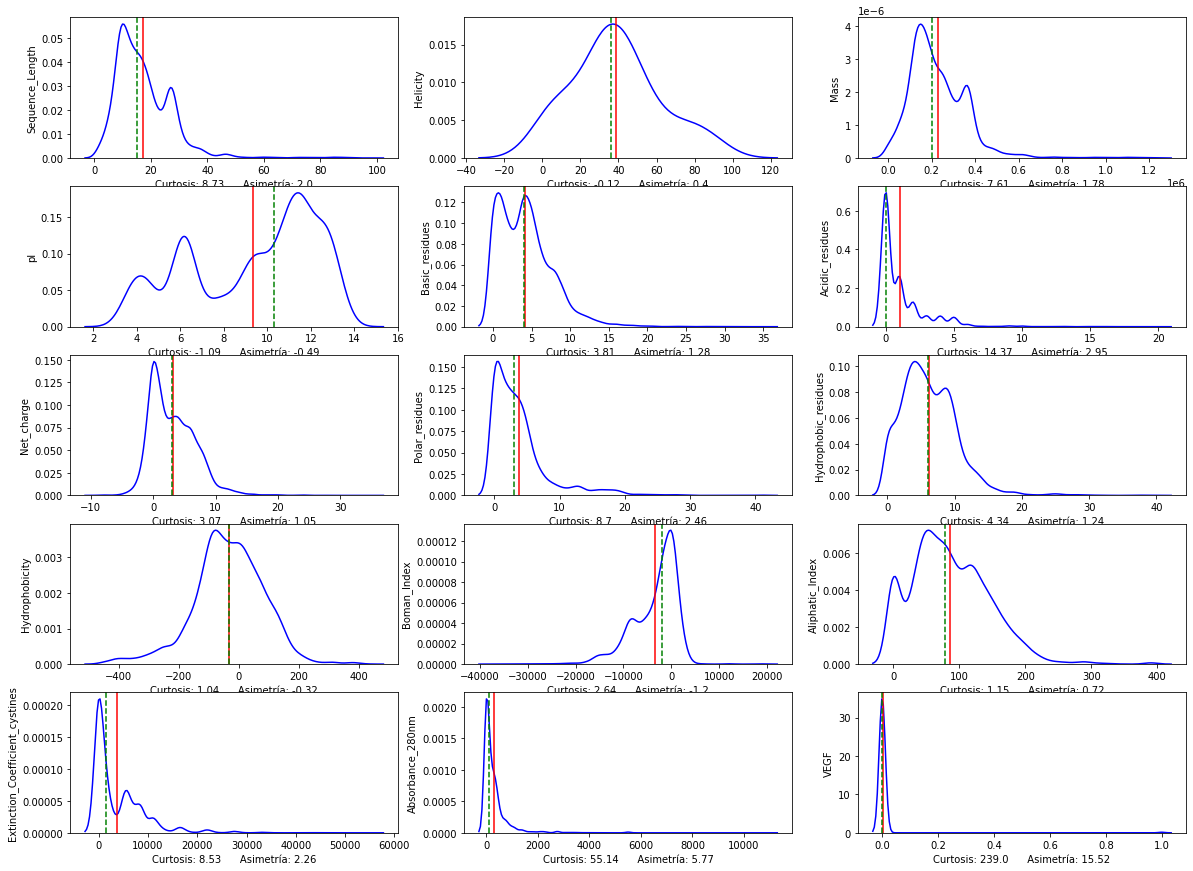

In [17]:
# Gráficas de densidad de las variables numéricas
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.kdeplot(df[col], color = 'Blue', ax=ax)
  ax.axvline(df[col].mean(), color='red')
  ax.axvline(df[col].median(), color='green', linestyle='--')
  ax.set(ylabel = f'{col}', xlabel = 'Curtosis: '+str(round(df[col].kurt(),2)) + "      Asimetría: " + str(round(df[col].skew(),2)))

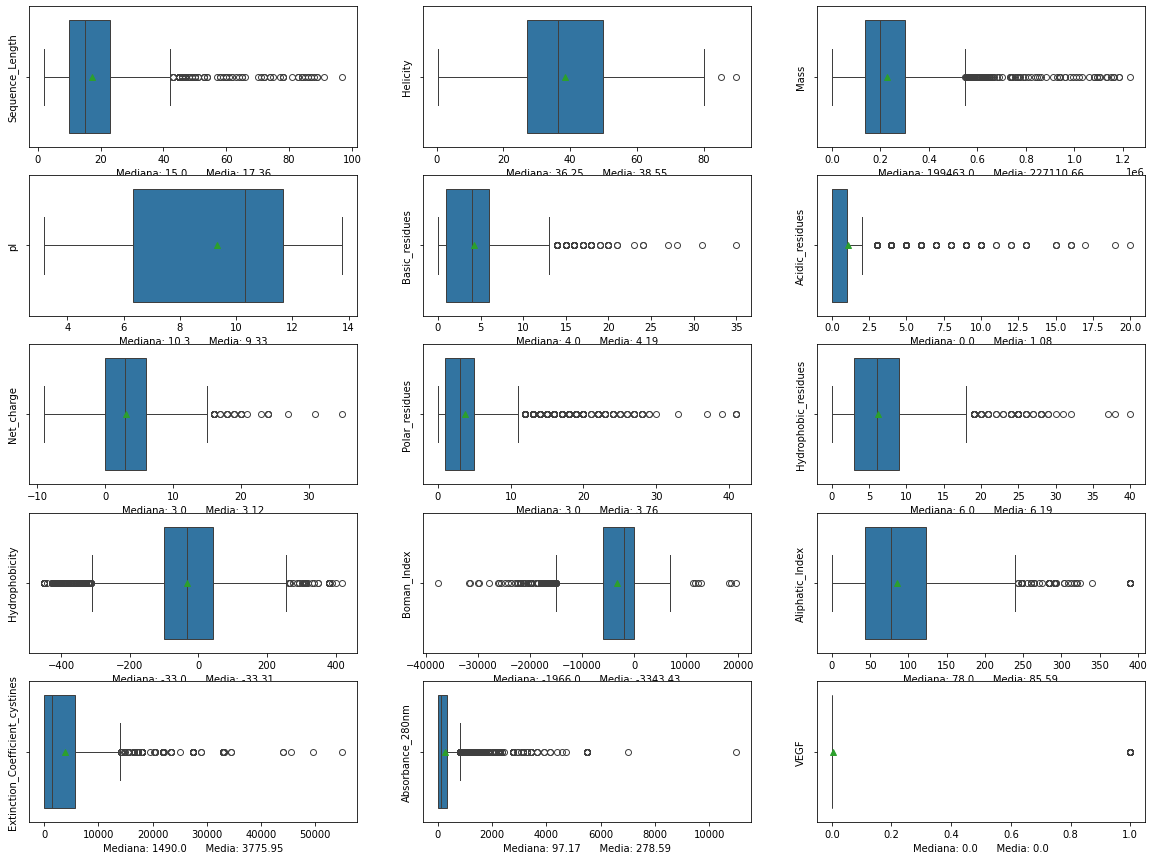

In [18]:
# Gráficas de caja de variables númericas
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.boxplot(x=df[col], showmeans=True, ax=ax)
  ax.set(ylabel = f'{col}', xlabel = 'Mediana: '+str(round(df[col].median(),2)) + "      Media: " + str(round(df[col].mean(),2)))

In [19]:
# Porcentajes de Otliers
sin_outliers = df.copy()
print('Porcentaje de outliers por variable:')
for col in num_col:
    IQR = sin_outliers[col].quantile(0.75) - sin_outliers[col].quantile(0.25)
    lower_limit = sin_outliers[col].quantile(0.25) - (IQR * 1.5)
    upper_limit = sin_outliers[col].quantile(0.75) + (IQR * 1.5)

    #Almacenando los valores atipicos dentro de la variable IQR_outlier
    IQR_outlier = sin_outliers[(sin_outliers[col] < lower_limit) | (sin_outliers[col] > upper_limit)]

    # Imprime los  porcentajes
    porcentaje = ((IQR_outlier[col].count())*100/len(sin_outliers.axes[0])).round(2)
    print(col +": "+ str(porcentaje)+'%')

    sin_outliers.drop(IQR_outlier.index, inplace = True)

Porcentaje de outliers por variable:
Sequence_Length: 1.81%
Helicity: 0.03%
Mass: 0.4%
pI: 0.0%
Basic_residues: 0.98%
Acidic_residues: 13.37%
Net_charge: 0.0%
Polar_residues: 8.46%
Hydrophobic_residues: 1.14%
Hydrophobicity: 2.9%
Boman_Index: 4.5%
Aliphatic_Index: 0.39%
Extinction_Coefficient_cystines: 5.29%
Absorbance_280nm: 5.77%
VEGF: 0.05%


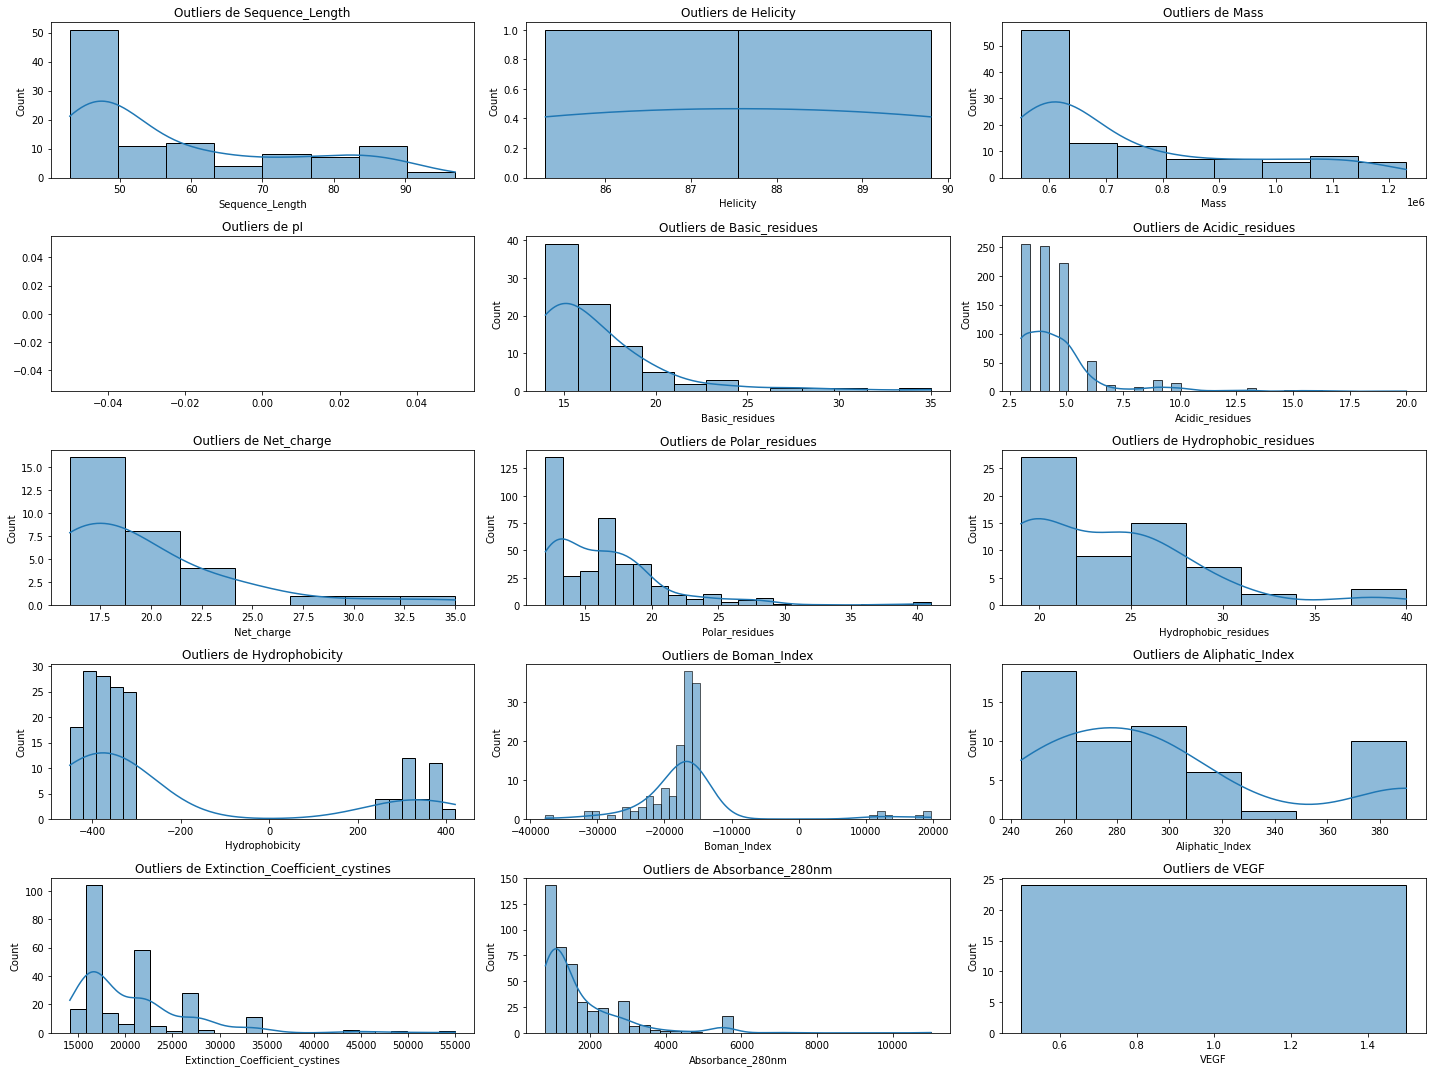

In [20]:
# Gráficas de aoutliers
def identificar_outliers(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_limit = df[col].quantile(0.25) - 1.5 * IQR
    upper_limit = df[col].quantile(0.75) + 1.5 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

# Crear una figura con subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.ravel()

# Crear un histograma para los valores atípicos de cada variable numérica
for col, ax in zip(df.select_dtypes(include='number').columns, axes):
    outliers = identificar_outliers(df, col)
    sns.histplot(outliers[col], kde=True, ax=ax)
    ax.set_title(f'Outliers de {col}')

plt.tight_layout()
plt.show()


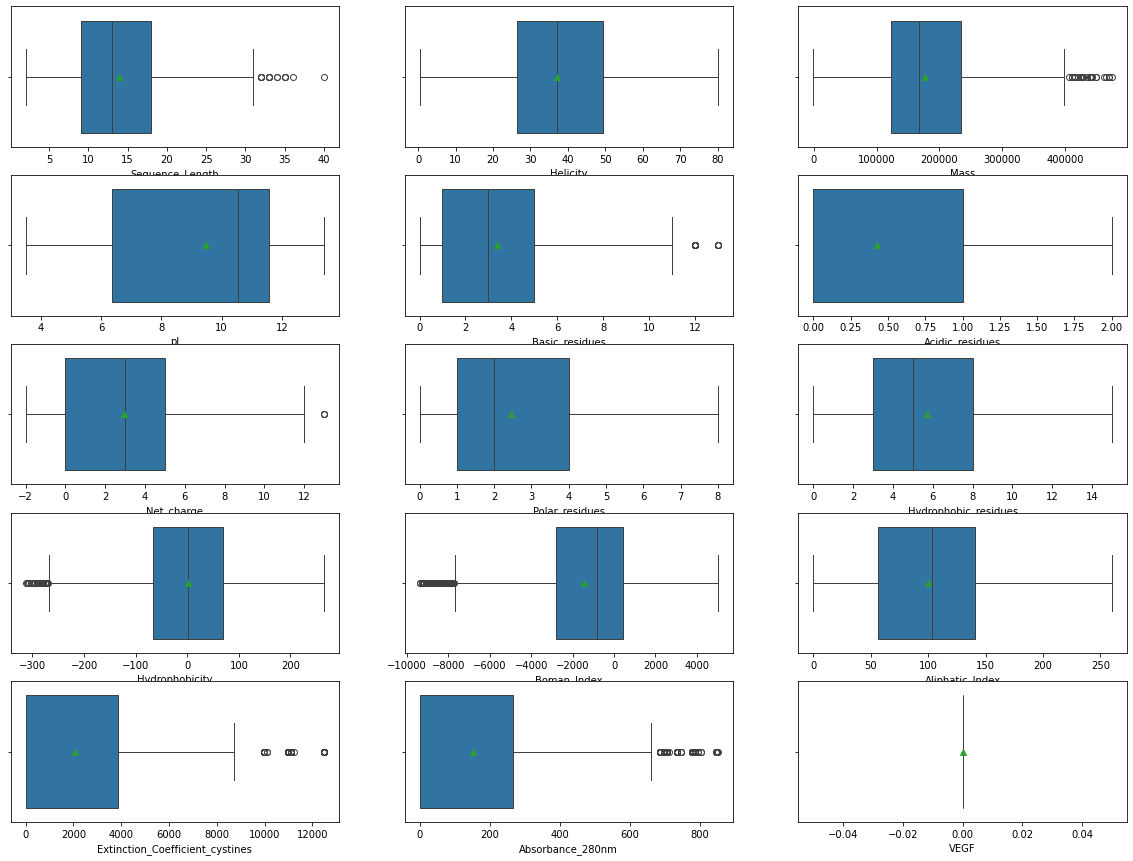

In [21]:
# Gráficas de caja sin valores atípicos
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.boxplot(x=sin_outliers[col], showmeans=True, ax=ax)

In [22]:
# Proporcion de valores atípicos
print('Filas totales',len(df.axes[0]))
print('Filas sin outliers',len(sin_outliers.axes[0]))
print("Porcentaje de los registros con outliers:")
print(round(100*(len(df.axes[0]) - len(sin_outliers.axes[0]))/len(df.axes[0]),2))

Filas totales 5851
Filas sin outliers 3659
Porcentaje de los registros con outliers:
37.46


####Variables Categóricas

In [23]:
print('Total de variables categóricas: ', len(cat_col))

Total de variables categóricas:  20


In [24]:
df[cat_col].describe().T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
Formula,5851,4804,C62H112N16O12,56
Absent_amino_acids,5843,3301,CHKLST,205
Hemolytic_Activity,1179,750,RBC: IC50 ≥ 65 µM,37
Cytotoxicity,1084,738,HEK 293T: Negligible cytotoxicity,76
Common_amino_acids,5851,568,R,1033
Origin,5779,447,Synthetic,3542
Other_Modification,939,331,Ⓧ(5)=(R)-2-Amino-2-methyl-9-decenoic acid; Ⓧ(1...,76
Disulfide_Bond,1216,242,Native peptide,367
Mechanism,389,121,Specifically block the α9α10nAChR,91
Affinity,132,107,IC50=16 nM (Blocking α9α10nAChR),5


In [25]:
# Recuentos únicos
for column in (cat_col):
    print(df[column].value_counts())
    print('-' * 50)

Origin
Synthetic                                    3542
Protein derived                               322
Synthetic construct                           285
FLAK peptides                                 138
Animalia                                       70
                                             ... 
Litopenaeus vannamei                            1
garlic                                          1
Fusarium spp. isolated from Korean potato       1
B. raniceps skin secretion                      1
Synthetic (derived from MGS4)                   1
Name: count, Length: 447, dtype: int64
--------------------------------------------------
Type
Synthetic peptide                             4519
Native peptide                                1287
Synthetic peptide (Derived from Decoralin)       8
Name: count, dtype: int64
--------------------------------------------------
Hemolytic_Activity
RBC: IC50 ≥ 65 µM                                                              37
Rat erythrocytes:

Existen variables categóricas con un gran número de datos únicos diferentes los cuales no son factibles para gráficar. Debido a esto únicamente aquellos con menos de 10 valores únicos:

In [26]:
# Descripción de las columnas categóricas
cat_desc = df[cat_col].describe().T
cat_desc = cat_desc[cat_desc['unique'] < 10]
cat_desc = cat_desc.sort_values(by='unique', ascending=False)
cat_desc

,count,unique,top,freq
Linear_Cyclic,5203,5,Linear,4326
Type,5814,3,Synthetic peptide,4519
Chiral,5851,3,L,5377


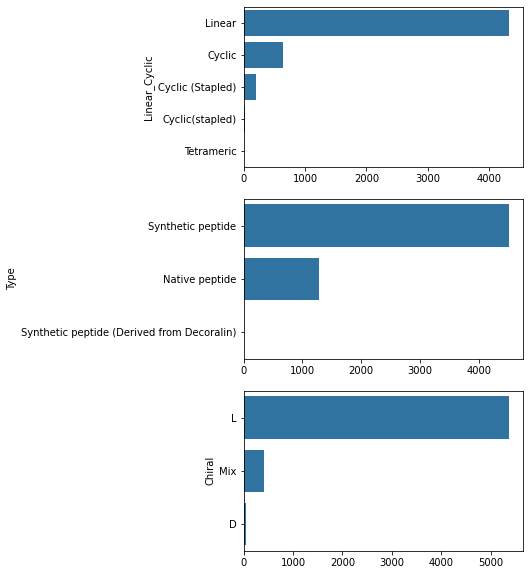

In [27]:
#Gráficas de recuentos únicos
fig, axes = plt.subplots(3,1, figsize=(5,10))
axes = axes.ravel()
for col, ax in zip(df[['Linear_Cyclic', 'Type', 'Chiral']], axes):
  sns.countplot(y=df[col], ax=ax, order=df[col].value_counts().index)
  ax.set(xlabel=None)

## Análisis bivariado y multivariado

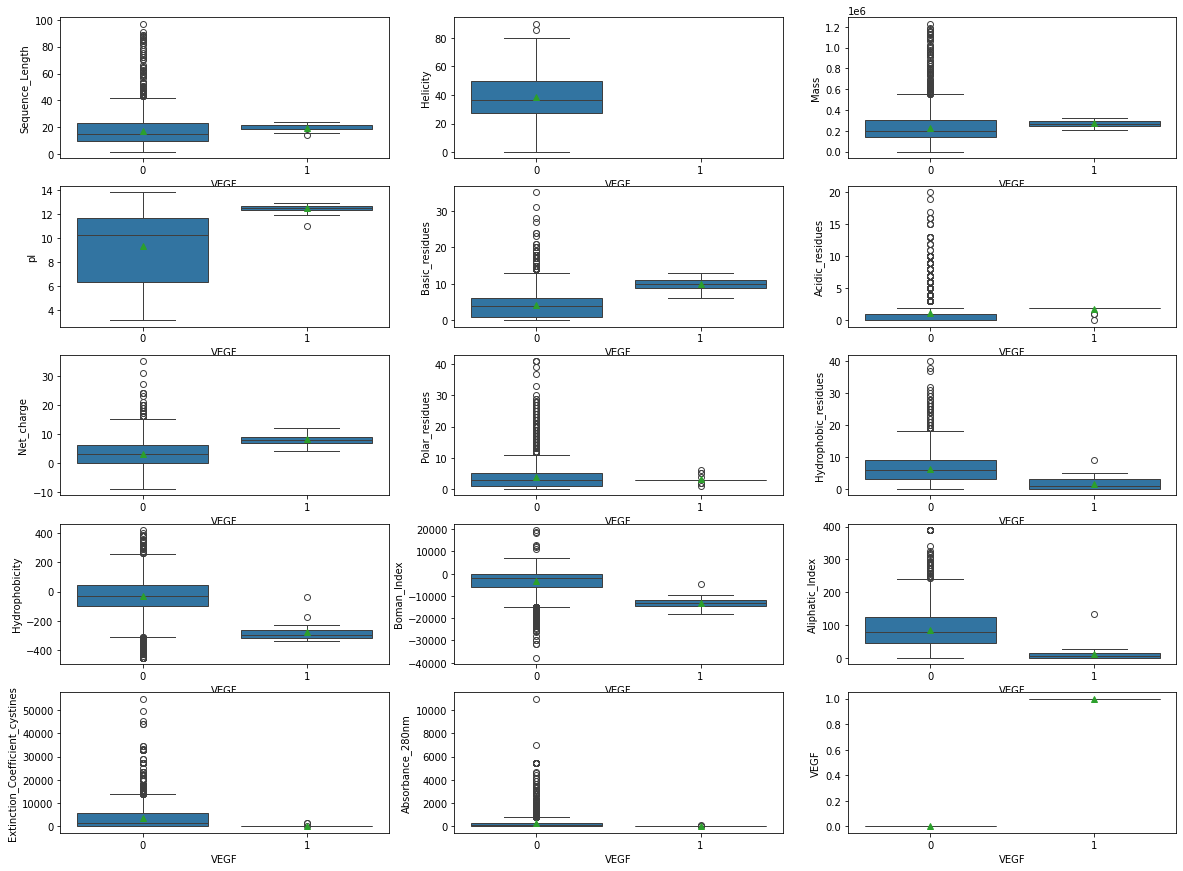

In [31]:
fig, axes = plt.subplots(5,3, figsize=(20,15))
axes = axes.ravel()

for col, ax in zip(df[num_col], axes):
  sns.boxplot(y=df[col], x=df['VEGF'], ax=ax, showmeans=True)
  ax.set(ylabel = f'{col}')

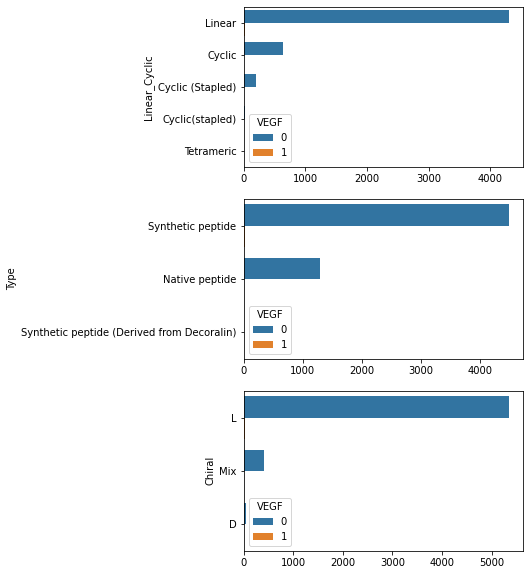

In [29]:
#Gráficas de recuentos únicos
fig, axes = plt.subplots(3,1, figsize=(5,10))
axes = axes.ravel()
for col, ax in zip(df[['Linear_Cyclic', 'Type', 'Chiral']], axes):
  sns.countplot(y=df[col], ax=ax, order=df[col].value_counts().index, hue = df['VEGF'])
  ax.set(xlabel=None)

<Axes: >

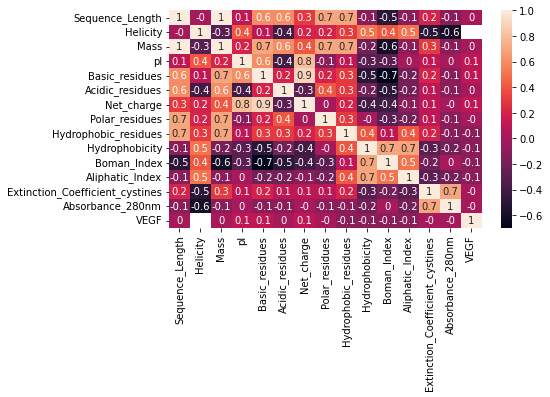

In [30]:
# Mapa de calor de las correlaciones entre variables cuantitativas
plt.figure(figsize = (7, 4))
sns.heatmap(round(df[num_col].corr(numeric_only=True),1), annot = True)

### Conlcusiones

De acuerdo al analisis del set de datos obtenido, nos damos cuenta que es un dataset desbalanceado, mostrando mas registros sin relacion a la proteina VEGF, esto se debe tener en consideracion en las siguientes etapas del proyecto, para hacer el tratamineto de los datos en forma correcta y minimizar los riesgos al implementar los modelos para obtener resultados solidos y lo mas acertados posibles